<a href="https://colab.research.google.com/github/srigouri/CE888-lab/blob/main/2101259.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASUAL INFERENCE ON IHDP AND JOBS DATASET 
-------------------

My assignment is to train a machine learning model for which casuality remains a hurdle.Making predictions and dealing with unfamiliar events is difficult when there is a lack of casual knowledge.Casuality can help machine learning's inability to generalise.Here the task is divided into 2 parts.
Part-1 deals with IHDP dataset and 
Part-2 deals with Jobs dataset.

# Loading required packages:

In [ ]:
!pip install econml

In [ ]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel

**PART-1**

---


**PROBLEM SETTING:**



Part-1: To estimate the casual effects of how the family support (treatment) effects the cognitive test score for the child (outcome).


Loading IHDP Dataset:

In [ ]:
ihdp_data=pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv')
ihdp_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
X=ihdp_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25']]
T=ihdp_data['t']
Y=ihdp_data[['yf']]
ite=ihdp_data['ite']

Applying Principal Component Analysis(PCA) for dimensionality reduction of X which has got 25 features as inputs

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [ ]:
X_pca=pca.fit_transform(X)

In [ ]:
T.value_counts()

0.0    608
1.0    139
Name: t, dtype: int64

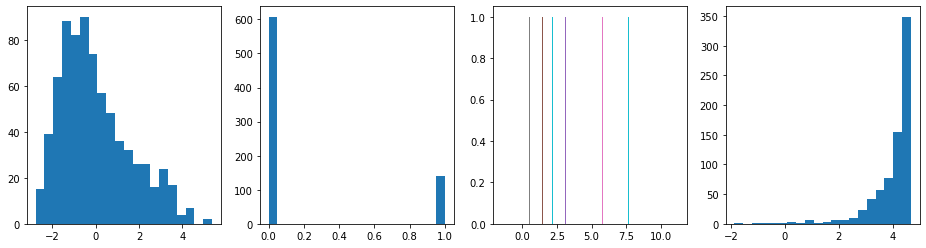

In [ ]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X_pca, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
axs[3].hist(ite, bins=bins)
plt.show()

**Treatment Effect:**        

The Average Treatment Effect (ATE) builds on ITE:
AT E = E[ITE]
Note: empirical (sample) ATE is the mean of ITEs

In [ ]:
ATE=np.mean(ite)
ATE

In [ ]:
Y.describe()

,yf
count,747.000000
mean,3.159538
std,2.179956
min,-1.543902
25%,1.626779
50%,2.577294
75%,4.494637
max,11.268228


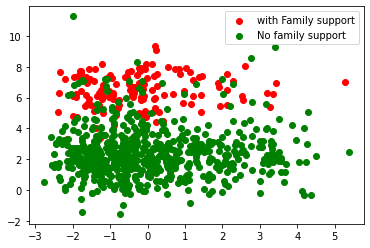

In [ ]:
limit = 10000
plt.scatter(X_pca[T == 1][:limit], Y[T == 1][:limit], c = "r", label = "with Family support")
plt.scatter(X_pca[T == 0][:limit], Y[T == 0][:limit], c = "g", label = "No family support")
plt.legend(ncol=1)
plt.savefig('ihdp_scatter.png',dpi=1200)

Hence,it is clear that the cognitive score of y factuals(outcome) is high where treatment is 1.i.e.,with family support the cognitive score is high for pre-mature infants with low birth-weight.

**Data-Preprocessing:**

Splitting the ihdp_data into training and testing for evaluation purposes with 80/20 ratio.Using X_pca as input for training the model.

Data is standardized using StandardScaler

In [ ]:
X_pca_train, X_pca_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X_pca, T, Y, ite, test_size=0.2)

scaler_x = StandardScaler()
X_pca_train = scaler_x.fit_transform(X_pca_train)
X_pca_test = scaler_x.transform(X_pca_test)

**PART-2**



---------------------------------------------------------------------------------------------------------



**PROBLEM SETTING:**

Loading Jobs Dataset:

The Jobs dataset is a combination of the experiment done by as part of the National
Supported Work Program (NSWP) and observational data from the Panel Study of Income Dynamics (PSID)

In [ ]:
Jobs_data=pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv')
Jobs_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
